In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
df = pd.read_csv('/content/mobile_recommendation_system_dataset.csv')
df = df.dropna()
df.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


In [ ]:
df.tail()

,name,ratings,price,imgURL,corpus
2540,"SAMSUNG Galaxy S20 FE 5G (Cloud Navy, 128 GB)",4.2,27440,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 10Processor S...
2541,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,Storage64 GBRAM4 GBExpandable Storage512GB Sy...
2542,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 11Processor S...
2544,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 25...",4.3,20463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 12Processor ...
2545,"vivo T2x 5G (Aurora Gold, 128 GB)",4.4,13999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 13Processor T...


In [ ]:
df.columns

Index(['name', 'ratings', 'price', 'imgURL', 'corpus'], dtype='object')

In [ ]:
df['name'].value_counts()

OPPO Reno10 5G (Ice Blue, 256 GB)             14
OPPO Reno10 5G (Silvery Grey, 256 GB)          7
SAMSUNG Metro 313                              7
OnePlus Nord 2T 5G (Gray Shadow, 128 GB)       5
OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)     5
                                              ..
SAMSUNG Galaxy J8 (Black, 64 GB)               1
vivo V25 5G (Elegant Black, 256 GB)            1
REDMI K50i 5G (Quick Silver, 256 GB)           1
OnePlus 8T 5G (Aquamarine Green, 256 GB)       1
REDMI Note 9 (Shadow Black, 64 GB)             1
Name: name, Length: 2128, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2534 non-null   object 
 1   ratings  2534 non-null   float64
 2   price    2534 non-null   object 
 3   imgURL   2534 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 118.8+ KB


In [ ]:
df.isnull().sum()

name       0
ratings    0
price      0
imgURL     0
corpus     0
dtype: int64

In [ ]:
data = df.reset_index(drop=True)

In [ ]:
df.shape

(2534, 5)

In [ ]:
df['price'] = df['price'].str.replace('₹', '', regex=True).str.replace(',', '', regex=True)

In [ ]:
df['price'] = df['price'].astype(float)

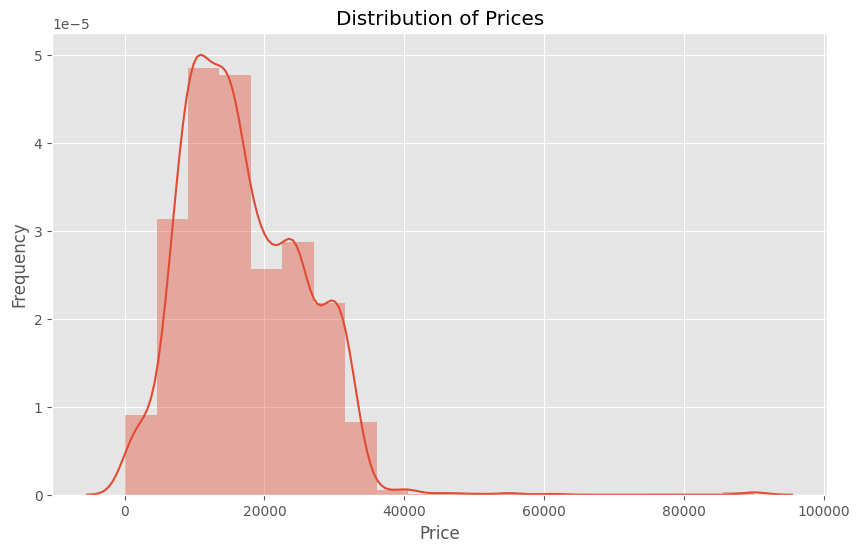

Minimum Price: 73.0
Maximum Price: 89999.0
Average Price: 16974.611681136543
Median Price: 15499.0
Potential Price Ranges:
Low-End: 73.0 - 10499.0
Mid-Range: 10499.0 - 23463.0
High-End: 23463.0 - 89999.0


In [ ]:
# Analyze the distribution of prices for the items.
plt.figure(figsize=(10, 6))
sns.distplot(df['price'], bins=20)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Identify price ranges and trends.
print("Minimum Price:", df['price'].min())
print("Maximum Price:", df['price'].max())
print("Average Price:", df['price'].mean())
print("Median Price:", df['price'].median())

# Calculate the quartiles to identify potential price ranges.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Print the potential price ranges.
print("Potential Price Ranges:")
print("Low-End:", df['price'].min(), "-", Q1)
print("Mid-Range:", Q1, "-", Q3)
print("High-End:", Q3, "-", df['price'].max())

In [ ]:
min  = df['ratings'].min()
max  = df['ratings'].max()
print(f'Range Of Rating = ({min},{max})')

Range Of Rating = (2.9,5.0)


In [ ]:
df_rating = df['ratings'].value_counts()
df_rating

4.3    581
4.2    511
4.4    420
4.5    318
4.1    240
4.6    152
4.0    104
4.7     87
3.9     61
3.8     22
3.7     11
3.6      5
3.0      4
3.5      4
2.9      4
3.3      4
3.1      3
5.0      2
4.8      1
Name: ratings, dtype: int64

<Axes: title={'center': 'Rating Count'}, xlabel='None'>

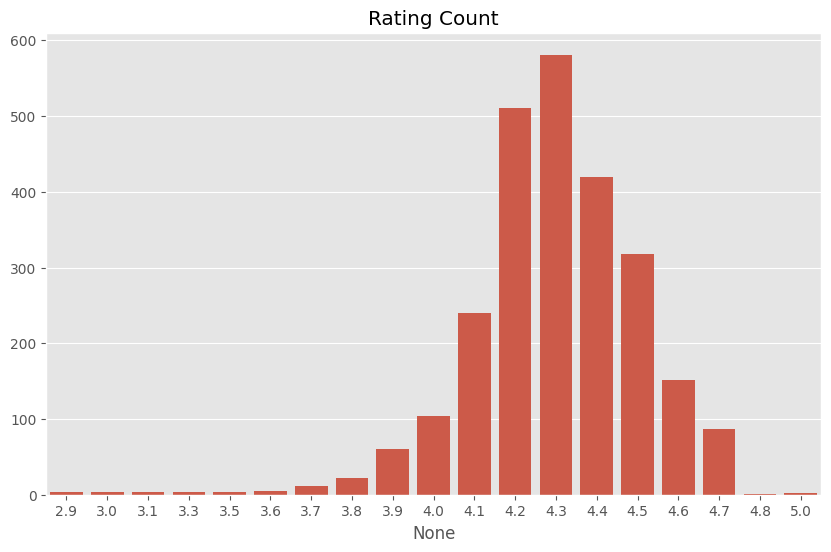

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Rating Count')
sns.barplot(x = df_rating.index, y = df_rating.values)

In [ ]:
import requests
from PIL import Image
import io
from io import BytesIO

(-0.5, 154.5, 311.5, -0.5)

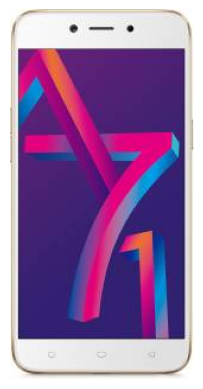

In [ ]:
image_data = BytesIO(response.content)

image = Image.open(image_data)

plt.imshow(image)
plt.axis('off')

In [ ]:
popular_products = pd.DataFrame(df.groupby('name')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(10)

,ratings
name,
"OPPO Reno10 5G (Ice Blue, 256 GB)",14
"OPPO Reno10 5G (Silvery Grey, 256 GB)",7
SAMSUNG Metro 313,7
"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)",5
"OnePlus Nord 2T 5G (Gray Shadow, 128 GB)",5
"OnePlus 10R 5G (Sierra Black, 256 GB)",5
"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",4
"Xiaomi 11Lite NE (Tuscany Coral, 128 GB)",4
"Xiaomi 11Lite NE (Jazz Blue, 128 GB)",4


<Axes: xlabel='name'>

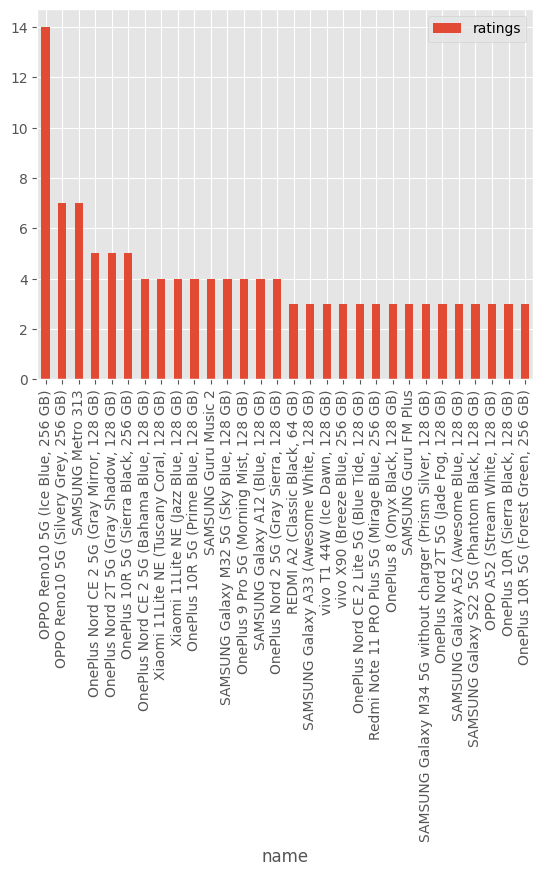

In [ ]:
most_popular.head(30).plot(kind = "bar")

In [ ]:
mobile_ratings = df.head(10000)

In [ ]:
ratings_utility_matrix = mobile_ratings.pivot_table(index='name', columns='ratings', values='price', fill_value=0)
ratings_utility_matrix.head()

ratings,2.9,3.0,3.1,3.3,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0
name,,,,,,,,,,,,,,,,,,,
"10A (Black, 64 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,9999.0,0.0,0.0,0,0,0,0
"10T 5G (Cosmic Black, 128 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,23999.0,0.0,0,0,0,0
"11 Lite NE (Jazz Blue, 128 GB)",0,0,0,0,0,0,0.0,0,0,22898.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
"13 pro (Ceramic Black, 256 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,14463.0,0.0,0.0,0,0,0,0
"13 pro (Ceramic White, 256 GB)",0,0,0,0,0,9454,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
ratings_utility_matrix.shape

(2128, 19)

In [ ]:
X = ratings_utility_matrix
X.head()

ratings,2.9,3.0,3.1,3.3,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0
name,,,,,,,,,,,,,,,,,,,
"10A (Black, 64 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,9999.0,0.0,0.0,0,0,0,0
"10T 5G (Cosmic Black, 128 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,23999.0,0.0,0,0,0,0
"11 Lite NE (Jazz Blue, 128 GB)",0,0,0,0,0,0,0.0,0,0,22898.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
"13 pro (Ceramic Black, 256 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,14463.0,0.0,0.0,0,0,0,0
"13 pro (Ceramic White, 256 GB)",0,0,0,0,0,9454,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
X.shape

(2128, 19)

In [ ]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(2128, 10)

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(2128, 2128)

In [ ]:
X.index[6]

'A70'

In [ ]:
i = "A70"

product_names = list(X.index)
product_name = product_names.index(i)
product_name

6

In [ ]:
correlation_product_name = correlation_matrix[product_name]
correlation_product_name.shape

(2128,)

In [ ]:
Recommend = list(X.index[correlation_product_name > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['11 Lite NE (Jazz Blue, 128 GB)',
 'Infinix Hot 12 Pro (Electric Blue, 128 GB)',
 'Infinix Hot 12 Pro (Halo White, 128 GB)',
 'Infinix Hot 12 Pro (Lightsaber Green, 128 GB)',
 'Infinix Hot 12 Pro (Racing Black, 128 GB)',
 'Infinix Hot 4 Pro (Magic Gold, 16 GB)',
 'Infinix Zero 5G 2023 TURBO (Coral Orange, 256 GB)',
 'Infinix Zero 5G 2023 TURBO (Pearly White, 256 GB)',
 'MOTOROLA Edge 20 Pro 5G (Iridescent Cloud, 128 GB)']

In [ ]:
#    - Implement a recommendation system based on ratings, prices, or other features to suggest items to users.

# Create a user-item matrix using pivot table
user_item_matrix = df.pivot_table(index='name', columns='ratings', values='price', fill_value=0)

# Calculate the cosine similarity between users
cosine_sim = sklearn.metrics.pairwise.cosine_similarity(user_item_matrix)

# Get the index of the item the user is interested in
item_index = user_item_matrix.index.get_loc('A70')

# Get the similarity scores for the item
similarity_scores = cosine_sim[item_index]

# Get the top 10 most similar items
similar_items = user_item_matrix.index[similarity_scores.argsort()[-10:]]

# Print the similar items
print("Similar Items:")
print(similar_items)

Similar Items:
Index(['Infinix Zero 5G 2023 TURBO (Coral Orange, 256 GB)',
       'Mi 11X Pro 5G (Cosmic Black, 256 GB)',
       'Mi 11X Pro 5G (Celestial Silver, 128 GB)',
       'SAMSUNG Galaxy S23 Ultra 5G (Green, 256 GB)',
       'SAMSUNG Galaxy S20 FE (Cloud Lavender, 128 GB)',
       'Infinix Hot 12 Pro (Electric Blue, 128 GB)',
       'SAMSUNG Galaxy S20 FE (Cloud Navy, 128 GB)',
       'Infinix Hot 12 Pro (Halo White, 128 GB)',
       'OnePlus 9 5G (Astral Black, 256 GB)',
       'OPPO A76 (Glowing Blue, 128 GB)'],
      dtype='object', name='name')


In [ ]:
x = data[['ratings', 'corpus']]
y = data['price']
x.shape, y.shape

((2534, 2), (2534,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


ValueError: could not convert string to float: 'Storage32 GBRAM3 GBExpandable Storage128GB  SystemAndroid Oreo 8Processor TypeQualcomm Snapdragon 430 MSM8937Processor Speed1.4 13MP 20MP 3G Capacity4000 Display Size14.35 cm (5.65 inch)Resolution720*1440 PixelsResolution TypeHD+Display TypeIPS In-cell'